In [52]:
!wget https://github.com/Mian56/CSC467--Module-3---Assignment-/blob/main/cameraman.jpg?raw=true -O cameraman.jpg
!wget https://github.com/Mian56/CSC467--Module-3---Assignment-/blob/main/baboon.png?raw=true -O baboon.png
!wget https://github.com/Mian56/CSC467--Module-3---Assignment-/blob/main/Lena.png?raw=trye -O Lena.png
!wget https://github.com/Mian56/CSC467--Module-3---Assignment-/blob/main/cameraman_transformed.jpg?raw=trye -O cameraman_transformed.jpg



--2025-03-03 16:54:38--  https://github.com/Mian56/CSC467--Module-3---Assignment-/blob/main/cameraman.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Mian56/CSC467--Module-3---Assignment-/raw/refs/heads/main/cameraman.jpg [following]
--2025-03-03 16:54:38--  https://github.com/Mian56/CSC467--Module-3---Assignment-/raw/refs/heads/main/cameraman.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Mian56/CSC467--Module-3---Assignment-/refs/heads/main/cameraman.jpg [following]
--2025-03-03 16:54:38--  https://raw.githubusercontent.com/Mian56/CSC467--Module-3---Assignment-/refs/heads/main/cameraman.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to ra

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Harris Corner Dectector**

In [6]:
#Harris conrner Dectector

#grayScale
image = cv2.imread('cameraman.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [7]:
#image gradients

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

In [10]:
#harris response

harris_response = cv2.cornerHarris(gray, blockSize=2, ksize=3,k=0.04)


In [13]:
#apply non-max suppression and thresholding
harris_response = cv2.dilate(harris_response, None)
threshold = 0.01 * harris_response.max()
corner_image = np.copy(image)
corner_image[harris_response > threshold] = [0,0,255]



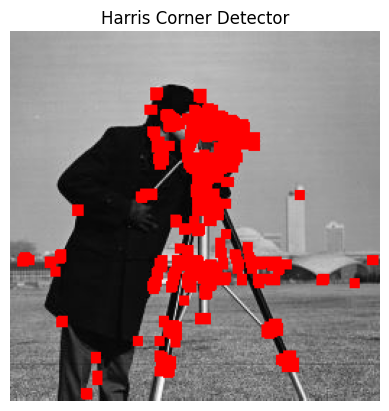

True

In [18]:
#show
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detector')
plt.axis('off')
plt.show()

cv2.imwrite('harris_corners.jpg', corner_image)

**Scale Invariance**

In [28]:
#load cameraman
image = cv2.imread('cameraman.jpg', 0)
feature_region = image[50:150, 50:150]

In [38]:
#computing laplacian
original_scales = [1.0, 1.5, 2.0, 2.5, 3.0]
laplacian_responses = []

for scale in original_scales: # Iterate using scale instead of scales
    scaled_image = cv2.resize(feature_region, None, fx=scale, fy=scale)
    laplacian = cv2.Laplacian(scaled_image, cv2.CV_64F)
    laplacian_responses.append(np.var(laplacian))


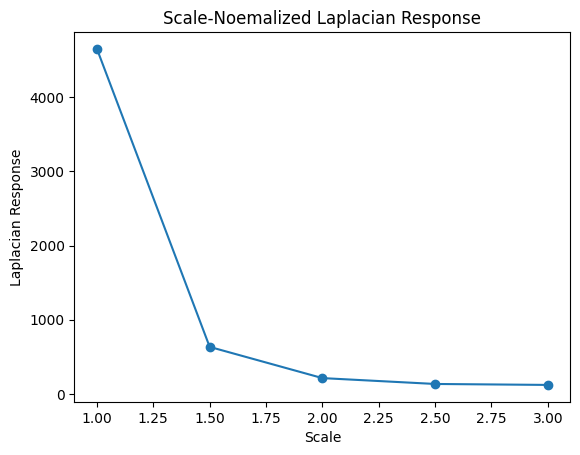

In [39]:
#show normalized scale
plt.plot(original_scales, laplacian_responses,marker='o') # Use original_scales
plt.xlabel('Scale')
plt.ylabel('Laplacian Response')
plt.title('Scale-Noemalized Laplacian Response')
plt.show()


In [44]:
#display image w/ selected keypoints

best_scale = original_scales[np.argmax(laplacian_responses)]
print(f"Best scale: {best_scale}")

Best scale: 1.0


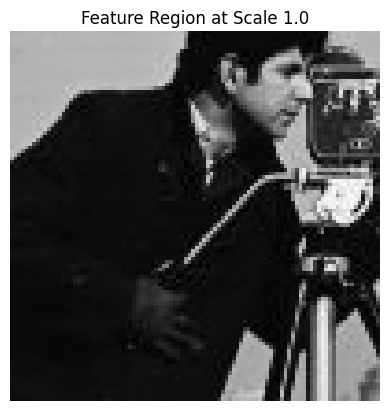

In [46]:
#how feature w/ best scale

scaled_image = cv2.resize(feature_region, None, fx= best_scale, fy =best_scale)
plt.imshow(scaled_image, cmap='gray')
plt.title(f'Feature Region at Scale {best_scale}')
plt.axis('off')
plt.show()

**Image Alignment**

In [67]:
#  Extract
sift = cv2.SIFT_create()
image1 = cv2.imread('cameraman.jpg', 0)
image2 = cv2.imread('cameraman_transformed.jpg', 0)

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)



In [68]:
#  Match features between two images
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)


In [69]:
#  ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)



In [70]:
# Estimatation
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


In [71]:
# Warp one image to align with the other
aligned_image = cv2.warpPerspective(image1, M, (image2.shape[1], image2.shape[0]))


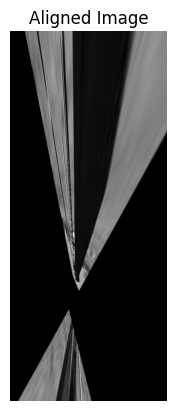

True

In [73]:
# show image
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')
plt.axis('off')
plt.show()

cv2.imwrite('aligned_image.jpg', aligned_image)